# Regional Statistics Data

In this notebook, we use the [aerovalAPI](api.aeroval.met.no) in order to fetch the co-located obs/mod data used for plotting the regional statistics.

In [1]:
import pandas as pd
import requests

# map aerovalAPI entrypoint
url = 'https://api.aeroval.met.no/api/0.2.1/regional_statistics/{project}/{experiment}/{frequency}/{obsvar}/{network}/{layer}'

In [4]:
# parameters
project = 'cams2-82'
experiment = 'IFS'
frequency = 'daily'
network = 'AeronetL1.5-d'
obsvar = 'od550aer'
layer = 'Column'

In [5]:
# Format the URL with the actual parameters
formatted_url = url.format(
    project=project,
    experiment=experiment,
    frequency=frequency,
    network=network,
    obsvar=obsvar,
    layer=layer
)
print(formatted_url)

https://api.aeroval.met.no/api/0.2.1/regional_statistics/cams2-82/IFS/daily/od550aer/AeronetL1.5-d/Column


In [31]:
# Make the GET request to fetch the JSON data
response = requests.get(formatted_url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the JSON data
    data = response.json()
else:
    print(f'Failed to fetch data. Status code: {response.status_code}')
    
# Flatten the nested dictionary and create a DataFrame 
df = pd.DataFrame.from_dict({(level1, level2, level3, level4): value 
                             for level1, inner_dict in data.items() 
                             for level2, inner_inner_dict in inner_dict.items() 
                             for level3, inner_inner_inner_dict in inner_inner_dict.items()
                             for level4, value in inner_inner_inner_dict.items()
                             }, orient='index') 
  
# Set MultiIndex 
df.index = pd.MultiIndex.from_tuples(df.index) 
df.head()

totnum  weighted  num_valid  \
IFS-OSUITE od550aer ALL 2013-2024-all  3168909.0       0.0   701414.0   
                        2013-2024-DJF   783009.0       0.0   142522.0   
                        2013-2024-MAM   798192.0       0.0   195395.0   
                        2013-2024-JJA   798192.0       0.0   197591.0   
                        2013-2024-SON   789516.0       0.0   165906.0   

                                       refdata_mean  refdata_std  data_mean  \
IFS-OSUITE od550aer ALL 2013-2024-all       0.19323      0.24320    0.21416   
                        2013-2024-DJF       0.17317      0.23858    0.17622   
                        2013-2024-MAM       0.21195      0.25391    0.23783   
                        2013-2024-JJA       0.19993      0.22481    0.23328   
                        2013-2024-SON       0.18045      0.25308    0.19610   

                                       data_std      rms      nmb     mnmb  \
IFS-OSUITE od550aer ALL 2013-2024-all   0.21317  0.15739  0.10829  0.21128   
                        2013-2024-DJF   0.18341  0.14519  0.01762  0.16700   
                        2013-2024-MAM   0.21957  0.15757  0.12212  0.23339   
                        2013-2024-JJA   0.21494  0.16506  0.16678  0.23056   
                        2013-2024-SON   0.22082  0.15789  0.08674  0.20030   

                                       ...      fge        R  R_spearman  \
IFS-OSUITE od550aer ALL 2013-2024-all  ...  0.43213  0.77401     0.79342   
                        2013-2024-DJF  ...  0.46719  0.79401     0.75658   
                        2013-2024-MAM  ...  0.42921  0.79392     0.79507   
                        2013-2024-JJA  ...  0.41616  0.73060     0.77712   
                        2013-2024-SON  ...  0.42445  0.78846     0.79357   

                                       R_kendall  num_coords_tot  \
IFS-OSUITE od550aer ALL 2013-2024-all    0.60348           723.0   
                        2013-2024-DJF    0.56661           723.0   
                        2013-2024-MAM    0.60555           723.0   
                        2013-2024-JJA    0.58901           723.0   
                        2013-2024-SON    0.60304           723.0   

                                       num_coords_with_data  R_spatial_mean  \
IFS-OSUITE od550aer ALL 2013-2024-all                 723.0         0.84655   
                        2013-2024-DJF                 604.0         0.91708   
                        2013-2024-MAM                 649.0         0.90419   
                        2013-2024-JJA                 642.0         0.86669   
                        2013-2024-SON                 627.0         0.90762   

                                       R_temporal_median  R_spatial_median  \
IFS-OSUITE od550aer ALL 2013-2024-all            0.69148               NaN   
                        2013-2024-DJF            0.54144               NaN   
                        2013-2024-MAM            0.62446               NaN   
                        2013-2024-JJA            0.67671               NaN   
                        2013-2024-SON            0.67827               NaN   

                                       R_temporal_mean  
IFS-OSUITE od550aer ALL 2013-2024-all              NaN  
                        2013-2024-DJF              NaN  
                        2013-2024-MAM              NaN  
                        2013-2024-JJA              NaN  
                        2013-2024-SON              NaN  

[5 rows x 22 columns]

## Plot some statistics

In [97]:
model = 'IFS-OSUITE'
modvar = 'od550aer'
period = '2013-2024'
season = 'all'
stats = 'nmb'

In [100]:
idx = pd.IndexSlice
data = df.loc[idx[model, modvar, :, f'{period}-{season}']][stats]

Text(0, 0.5, 'NMB (%)')

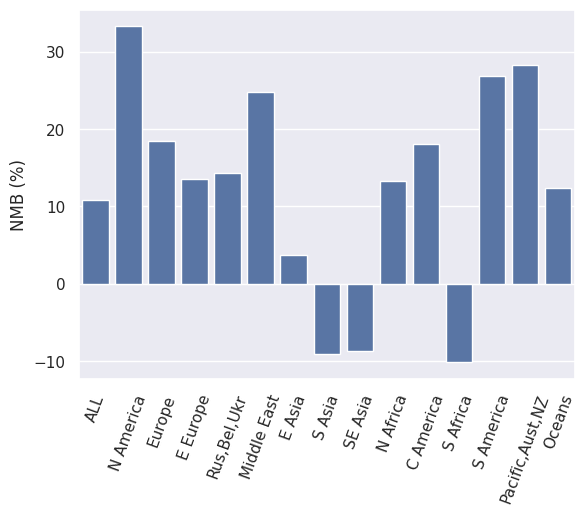

In [112]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.barplot(data*100)
plt.xticks(rotation=70)
plt.ylabel('NMB (%)')